# 02. Neural Network classification with PyTorch

Classification is a problem of predicting wether something is one thing or another (there can be multiple things as the options).

## 1. Make classification data and get ir ready

In [ ]:
import sklearn

from sklearn.datasets import make_circles

In [ ]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
    )

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make a DataFrame of circle data
import pandas as pd
circles = pd.DataFrame(
    {"X1": X[:, 0],
     "X2": X[:, 1],
     "label": y
    }
)

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


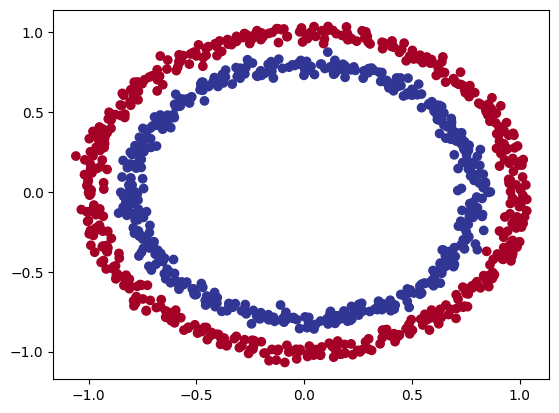

In [ ]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(
    x=X[:, 0],
    y=X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu
)

**Note:** The data we're working is often refered to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and values for one sample of y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and values for one sample of y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and values for one sample of y: 1
Shapes for one sample of X: (2,) and values for one sample of y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
# Turn data into tensors
import torch
torch.__version__

'2.5.1+cu121'

In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
X = torch.from_numpy(X).type(torch.float) # convert both to float32 from float64, the default in numpy
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one.
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop.

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup a device agnostic code, let's create a model that:

1. Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`).
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data.
3. Define a `forward()` method that outlines the forward pass (or the forward computation) of the model.
4. Instantiate an instance of our model class and send ir to the target `device`.

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

In [ ]:
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)

In [ ]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0v2  = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [ ]:
class CircleModelV0_2(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_feaures=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.two_linear_layers(x)

In [ ]:
model_0v2.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1302,  0.2762],
                      [ 0.5926,  0.0903],
                      [ 0.5633, -0.3297],
                      [-0.2213, -0.6687],
                      [ 0.1070,  0.3885]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.6834,  0.6731,  0.3131, -0.2360,  0.6208], device='cuda:0')),
             ('1.weight',
              tensor([[0.2440, 0.0856, 0.2533, 0.1867, 0.2620]], device='cuda:0')),
             ('1.bias', tensor([-0.0067], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0v2(X_test.to(device))

print(f"Lenght of predictions: {len(untrained_preds)}, Shape of predictions: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape of test samples: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Lenght of predictions: 200, Shape of predictions: torch.Size([200, 1])
Length of test samples: 200, Shape of test samples: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

For regression MAE or MSE (Mean Absolute Error or Mean Squared Error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy)

The Lossfunction measures how *wrong* your models predictions are.

Two of the most common optimizers are SGD and Adam, however PyTorch has many built-in options.

* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`

In [ ]:
# Setup the loss function

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss has the sigmoid activation function built-in

# BCELoss requires inputs to have gone through the sigmoid activation function
# prior to input to BCELoss.

# Setup the optimizer
optimizer = torch.optim.SGD(
    params=model_0v2.parameters(),
    lr=0.1
    )

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3. Train model

To train pour model, we're going to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logists** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [ ]:
# view the first 5 outputs of the forward pass on the test data
model_0v2.eval()
with torch.inference_mode():
  y_logits = model_0v2(X_test.to(device))[:5]

y_logits[:5]

tensor([[0.3384],
        [0.3876],
        [0.3212],
        [0.3428],
        [0.4987]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into
# prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)

y_pred_probs

tensor([[0.5838],
        [0.5957],
        [0.5796],
        [0.5849],
        [0.6221]], device='cuda:0')

For our prediction probability values, we need to perform a rang-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred lables)
y_pred_labels = torch.round(torch.sigmoid(model_0v2(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

## 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

# Boulding training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0v2.train()

  # 1. Forward pass
  y_logits = model_0v2(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate the loss / accuracy
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0v2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0v2(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

    # Print what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.71557 | Acc: 50.00% | Test Loss: 0.71338 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.69959 | Acc: 50.00% | Test Loss: 0.69805 | Test Acc: 50.00%
Epoch: 20 | Loss: 0.69549 | Acc: 50.00% | Test Loss: 0.69398 | Test Acc: 50.00%
Epoch: 30 | Loss: 0.69433 | Acc: 54.37% | Test Loss: 0.69284 | Test Acc: 58.00%
Epoch: 40 | Loss: 0.69392 | Acc: 51.62% | Test Loss: 0.69254 | Test Acc: 53.00%
Epoch: 50 | Loss: 0.69373 | Acc: 51.88% | Test Loss: 0.69249 | Test Acc: 50.00%
Epoch: 60 | Loss: 0.6936 | Acc: 51.25% | Test Loss: 0.69254 | Test Acc: 48.50%
Epoch: 70 | Loss: 0.69351 | Acc: 51.12% | Test Loss: 0.69261 | Test Acc: 49.00%
Epoch: 80 | Loss: 0.69343 | Acc: 51.00% | Test Loss: 0.69271 | Test Acc: 50.00%
Epoch: 90 | Loss: 0.69336 | Acc: 51.62% | Test Loss: 0.6928 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.69331 | Acc: 51.25% | Test Loss: 0.6929 | Test Acc: 49.50%
Epoch: 110 | Loss: 0.69326 | Acc: 50.50% | Test Loss: 0.693 | Test Acc: 52.00%
Epoch: 120 | Loss: 0.69322 | Acc: 50.00% | T

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything.

To inspect we are making predictions visual.

To do so we're going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


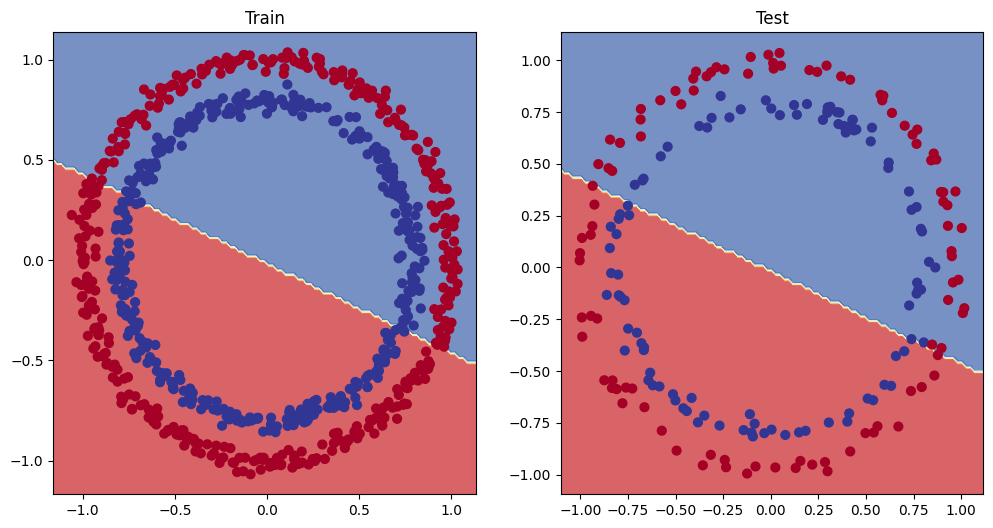

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0v2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0v2, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers -give the model chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's prespective because they deal with the model, rather than the data.

These values we can change are **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

In [ ]:
model_1 = CircleModelV1().to(device)

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#  Create a loss function

loss_fn = torch.nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
# Write a training and evaluation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction lables

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.5f}%")

Epoch 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261, Test Acc: 51.00000%
Epoch 10 | Loss: 0.69369, Acc: 50.25% | Test Loss: 0.69270, Test Acc: 50.00000%
Epoch 20 | Loss: 0.69351, Acc: 50.12% | Test Loss: 0.69283, Test Acc: 49.50000%
Epoch 30 | Loss: 0.69339, Acc: 50.50% | Test Loss: 0.69297, Test Acc: 48.00000%
Epoch 40 | Loss: 0.69329, Acc: 50.38% | Test Loss: 0.69310, Test Acc: 49.00000%
Epoch 50 | Loss: 0.69322, Acc: 49.88% | Test Loss: 0.69324, Test Acc: 50.00000%
Epoch 60 | Loss: 0.69317, Acc: 49.38% | Test Loss: 0.69336, Test Acc: 51.50000%
Epoch 70 | Loss: 0.69312, Acc: 49.38% | Test Loss: 0.69348, Test Acc: 50.50000%
Epoch 80 | Loss: 0.69309, Acc: 50.12% | Test Loss: 0.69359, Test Acc: 50.00000%
Epoch 90 | Loss: 0.69307, Acc: 50.50% | Test Loss: 0.69370, Test Acc: 48.50000%
Epoch 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69379, Test Acc: 48.00000%
Epoch 110 | Loss: 0.69303, Acc: 50.88% | Test Loss: 0.69388, Test Acc: 46.50000%
Epoch 120 | Loss: 0.69302, Acc: 50.75% 

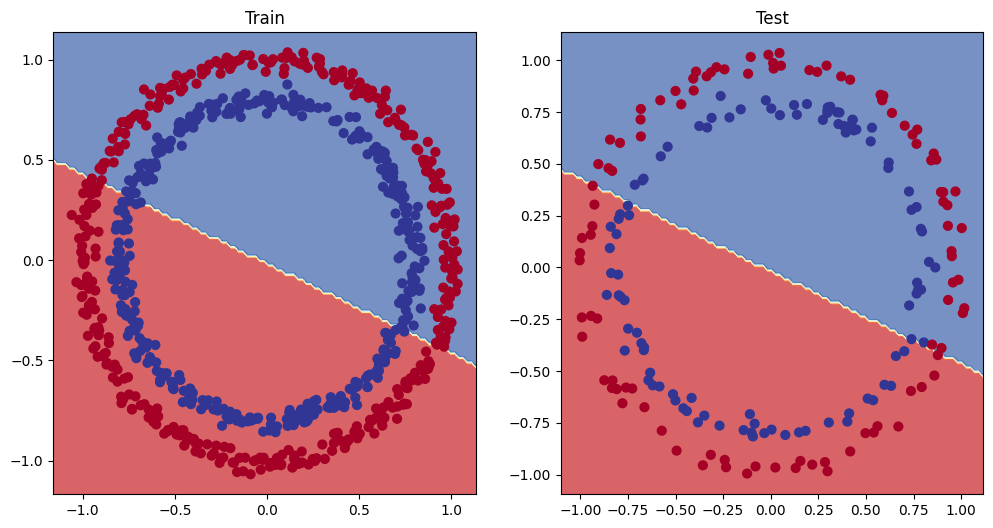

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [ ]:
# Create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression, X_test_regression, y_test_regression = X_regression[:train_split], y_regression[:train_split], X_regression[train_split:], y_regression[train_split:]

#check the lenght of each
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

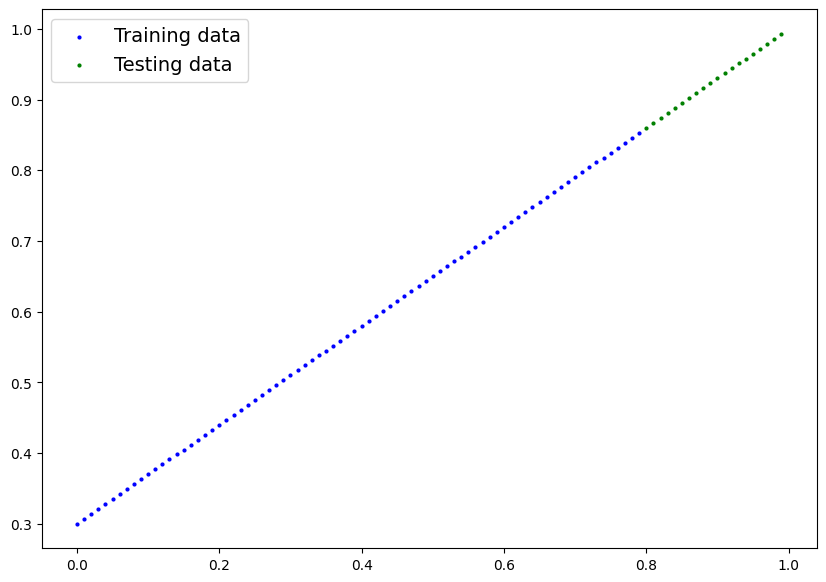

In [ ]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

## 5.2 Adjusting model_1 to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss() # Mean Absolute Error
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data to the target device
X_train_regression, y_train_regression, X_test_regression, y_test_regression = X_train_regression.to(device), y_train_regression.to(device), X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  # Training
  model_2.train()

  # 1. Forward pass
  y_pred = model_2(X_train_regression)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_2(X_test_regression)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.54143
Epoch: 10 | Loss: 0.14550 | Test Loss: 0.02363
Epoch: 20 | Loss: 0.14420 | Test Loss: 0.05597
Epoch: 30 | Loss: 0.10136 | Test Loss: 0.03785
Epoch: 40 | Loss: 0.07525 | Test Loss: 0.00984
Epoch: 50 | Loss: 0.07625 | Test Loss: 0.02102
Epoch: 60 | Loss: 0.10320 | Test Loss: 0.02754
Epoch: 70 | Loss: 0.08643 | Test Loss: 0.01007
Epoch: 80 | Loss: 0.06937 | Test Loss: 0.01326
Epoch: 90 | Loss: 0.08678 | Test Loss: 0.03027
Epoch: 100 | Loss: 0.09309 | Test Loss: 0.02901
Epoch: 110 | Loss: 0.06735 | Test Loss: 0.00973
Epoch: 120 | Loss: 0.08538 | Test Loss: 0.03464
Epoch: 130 | Loss: 0.07850 | Test Loss: 0.02388
Epoch: 140 | Loss: 0.09153 | Test Loss: 0.02218
Epoch: 150 | Loss: 0.07135 | Test Loss: 0.02059
Epoch: 160 | Loss: 0.06966 | Test Loss: 0.01357
Epoch: 170 | Loss: 0.07144 | Test Loss: 0.01682
Epoch: 180 | Loss: 0.06925 | Test Loss: 0.01691
Epoch: 190 | Loss: 0.07345 | Test Loss: 0.02627
Epoch: 200 | Loss: 0.07376 | Test Loss: 0.02850
Epo

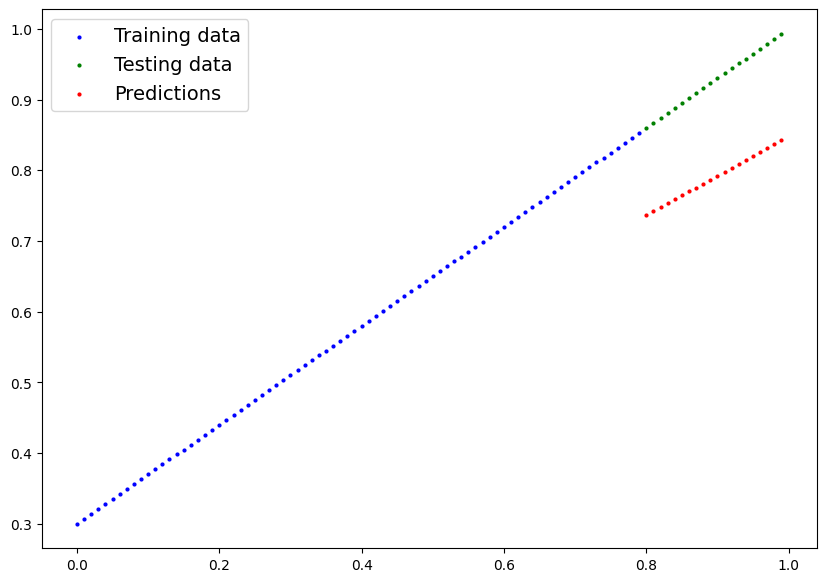

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(
    train_data=X_train_regression.cpu(),
    train_labels=y_train_regression.cpu(),
    test_data=X_test_regression.cpu(),
    test_labels=y_test_regression.cpu(),
    predictions=y_preds.cpu()
    )

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) amount of fucntions?

### 6.1 Recreating non-linear data (red and blue circles)

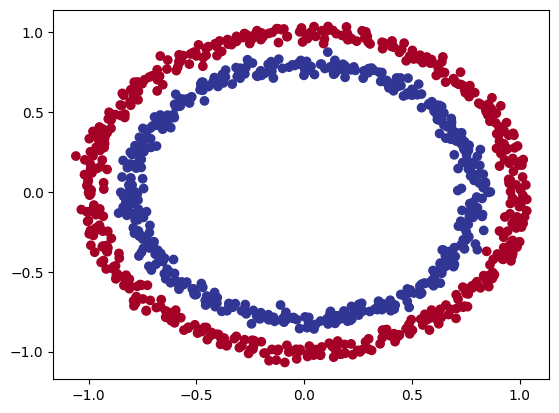

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity
 * Linear = straight lines
 * Non-linear = non-straight lines

 Artificial neural networks are a large combination of linear (straight) and non-linear (non-straight) functions wich are potentially able to find patterns in data.

In [ ]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()  # ReLU is a non-linear activation function

  def forward(self, x):
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)
    return z

In [ ]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model_3.parameters(),
    lr=0.1
)

### 6.3 Training a model with non-linearity

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes logits as first input)
  acc = accuracy_fn(
      y_true=y_train,
      y_pred=y_pred
  )

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(
        test_logits,
        y_test
    )

    test_acc = accuracy_fn(
        y_true=y_test,
        y_pred=test_pred
    )

  # Print what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test loss: 0.6932, Test acc: 50.00%
Epoch: 10 | Loss: 0.6925, Acc: 50.50% | Test loss: 0.6926, Test acc: 50.00%
Epoch: 20 | Loss: 0.6922, Acc: 59.13% | Test loss: 0.6923, Test acc: 56.50%
Epoch: 30 | Loss: 0.6921, Acc: 70.25% | Test loss: 0.6921, Test acc: 68.00%
Epoch: 40 | Loss: 0.6919, Acc: 68.38% | Test loss: 0.6919, Test acc: 71.00%
Epoch: 50 | Loss: 0.6918, Acc: 58.25% | Test loss: 0.6918, Test acc: 58.00%
Epoch: 60 | Loss: 0.6917, Acc: 54.00% | Test loss: 0.6916, Test acc: 54.50%
Epoch: 70 | Loss: 0.6915, Acc: 53.12% | Test loss: 0.6915, Test acc: 53.00%
Epoch: 80 | Loss: 0.6914, Acc: 52.62% | Test loss: 0.6913, Test acc: 53.00%
Epoch: 90 | Loss: 0.6913, Acc: 52.75% | Test loss: 0.6912, Test acc: 53.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test loss: 0.6910, Test acc: 52.50%
Epoch: 110 | Loss: 0.6910, Acc: 52.88% | Test loss: 0.6909, Test acc: 53.50%
Epoch: 120 | Loss: 0.6909, Acc: 53.12% | Test loss: 0.6907, Test acc: 54.00%
Epoch: 130

### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

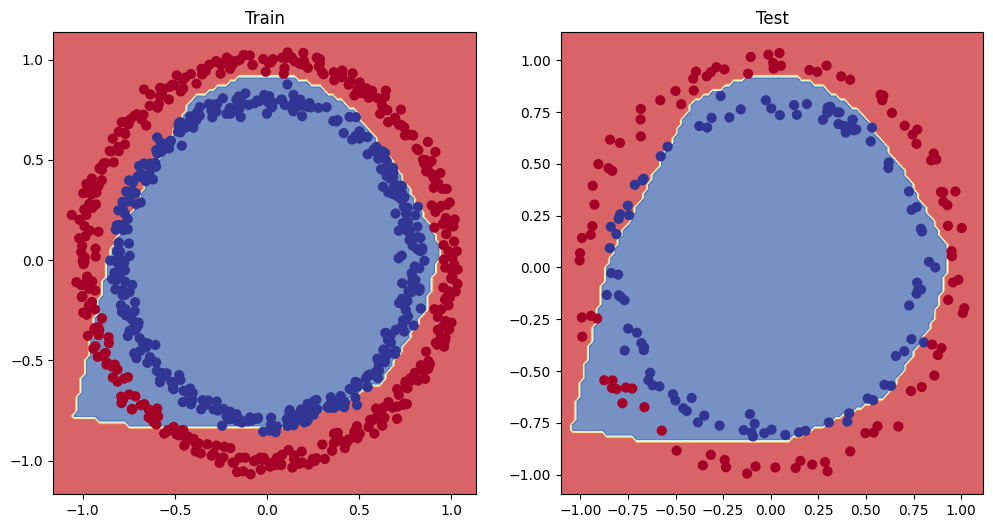

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 6.5 improve the model

In [ ]:
# Improve model

# Build a model with non-linear activation functions
from torch import nn
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=4)
    self.layer_2 = nn.Linear(in_features=4, out_features=8)
    self.layer_3 = nn.Linear(in_features=8, out_features=16)
    self.layer_4 = nn.Linear(in_features=16, out_features=1)
    self.relu = nn.ReLU()  # ReLU is a non-linear activation function

  def forward(self, x):
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)
    z = self.relu(z)
    z = self.layer_4(z)
    return z

model_4 = CircleModelV3().to(device)
model_4

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model_4.parameters(),
    lr=0.1
)

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# Loop through data
epochs = 2048

for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes logits as first input)
  acc = accuracy_fn(
      y_true=y_train,
      y_pred=y_pred
  )

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_4(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(
        test_logits,
        y_test
    )

    test_acc = accuracy_fn(
        y_true=y_test,
        y_pred=test_pred
    )

  # Print what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.7036, Acc: 50.00% | Test loss: 0.7018, Test acc: 50.00%
Epoch: 10 | Loss: 0.6964, Acc: 50.00% | Test loss: 0.6952, Test acc: 50.00%
Epoch: 20 | Loss: 0.6936, Acc: 50.00% | Test loss: 0.6928, Test acc: 50.00%
Epoch: 30 | Loss: 0.6926, Acc: 50.00% | Test loss: 0.6918, Test acc: 50.00%
Epoch: 40 | Loss: 0.6921, Acc: 50.00% | Test loss: 0.6914, Test acc: 50.00%
Epoch: 50 | Loss: 0.6919, Acc: 63.38% | Test loss: 0.6912, Test acc: 57.00%
Epoch: 60 | Loss: 0.6918, Acc: 51.25% | Test loss: 0.6911, Test acc: 49.50%
Epoch: 70 | Loss: 0.6917, Acc: 51.25% | Test loss: 0.6911, Test acc: 51.00%
Epoch: 80 | Loss: 0.6916, Acc: 51.75% | Test loss: 0.6910, Test acc: 51.00%
Epoch: 90 | Loss: 0.6916, Acc: 51.62% | Test loss: 0.6909, Test acc: 52.50%
Epoch: 100 | Loss: 0.6915, Acc: 51.50% | Test loss: 0.6908, Test acc: 52.00%
Epoch: 110 | Loss: 0.6914, Acc: 51.62% | Test loss: 0.6908, Test acc: 52.00%
Epoch: 120 | Loss: 0.6913, Acc: 51.75% | Test loss: 0.6907, Test acc: 52.00%
Epoch: 130

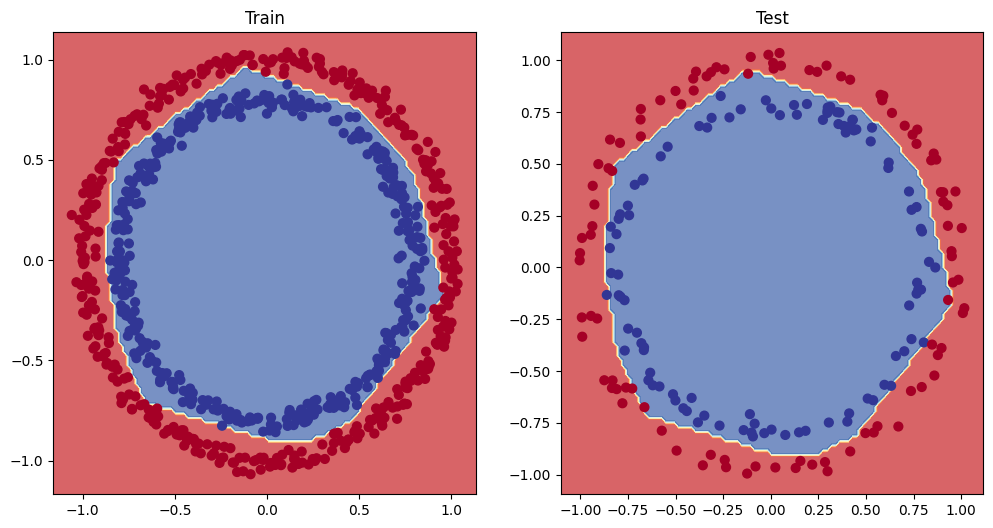

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we givve it the tools to discover patterns in data, and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.


In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

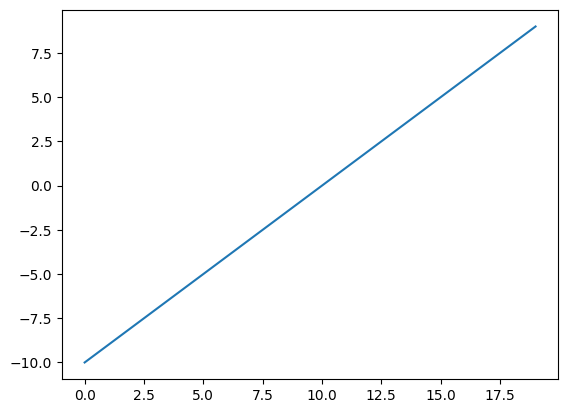

In [ ]:
# Visualize the tensor
plt.plot(A)

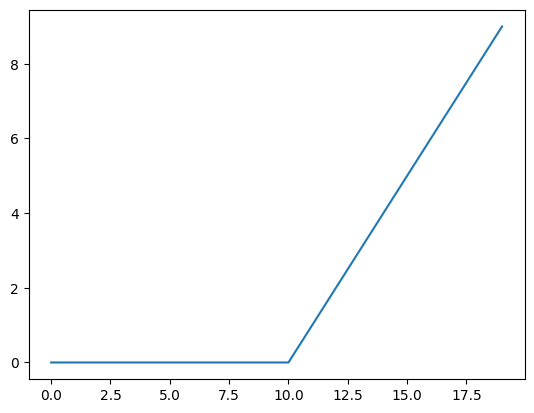

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

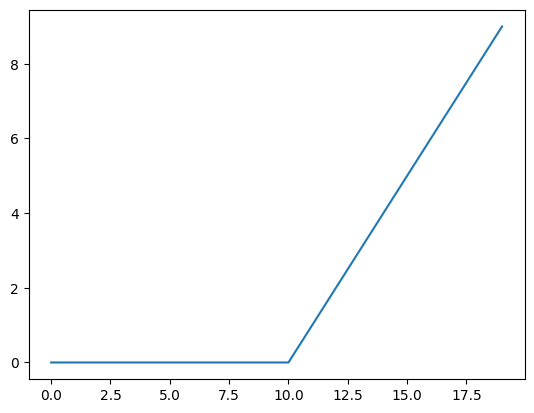

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A));

In [ ]:
# Sigmoid activation function
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

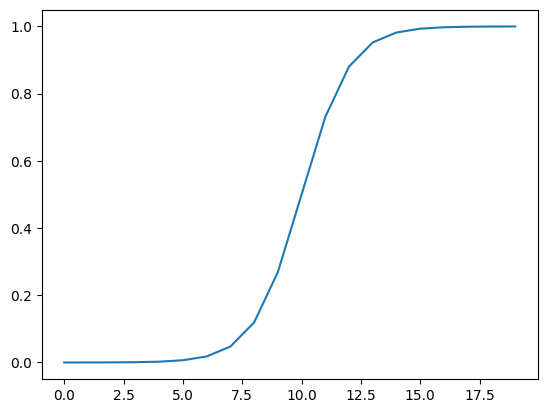

In [ ]:
plt.plot(torch.sigmoid(A));

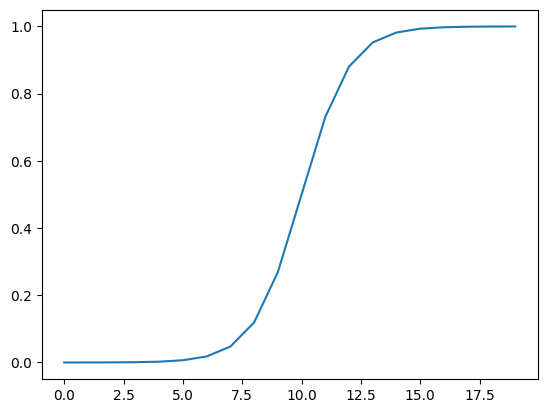

In [ ]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification problem.

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam)
* Multi-class classification = mora than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

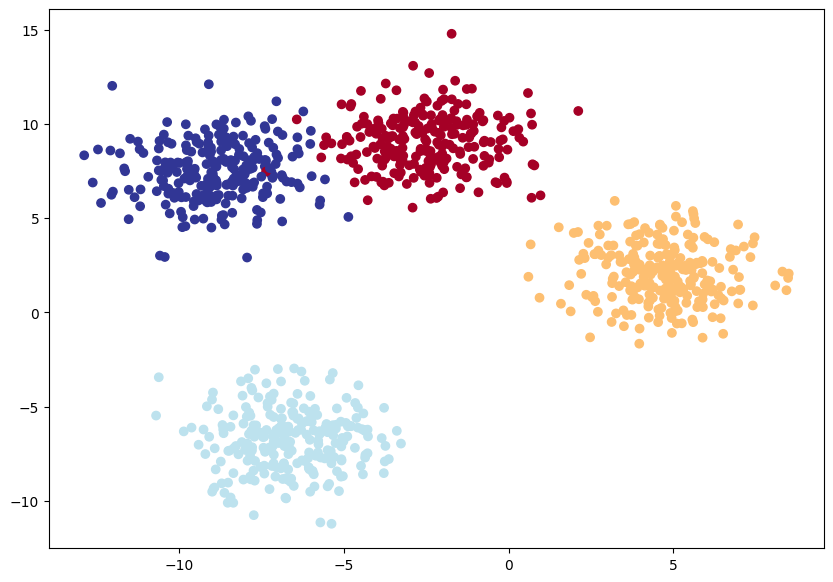

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob , y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5, # add noise
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob, y_blob = torch.from_numpy(X_blob).type(torch.float), torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
### 8.2 Building a multi-class classification model in PyTorch
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
    Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features.
      output_features (int): Number of output features (number of classes)
      hidden_units (int): Number of hidden units between layers, default 8.

    Returns:


    Example:


    """
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(), # using non-linearity to train model
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [ ]:
# Create an instance of Blob model and send it to the target device

model_4 = BlobModel(
    input_features=NUM_FEATURES,
    output_features=NUM_CLASSES
).to(device)

In [ ]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(
    params=model_4.parameters(),
    lr=0.1
)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate, train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred Labels (take the argmax of the prediction probabilities)

In [ ]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_preds[:10]

tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0')

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [ ]:
# Convert our model's prediction probabilities yo prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train, X_blob_test, y_blob_test = X_blob_train.to(device), y_blob_train.to(device), X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

  ### Print out what's happening.
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}% ")

Epoch: 0 | Loss: 1.0636, Acc: 54.62% | Test Loss: 1.0039, Test Acc: 55.00% 
Epoch: 10 | Loss: 0.6210, Acc: 97.25% | Test Loss: 0.6367, Test Acc: 98.00% 
Epoch: 20 | Loss: 0.4061, Acc: 98.75% | Test Loss: 0.4104, Test Acc: 100.00% 
Epoch: 30 | Loss: 0.2362, Acc: 99.12% | Test Loss: 0.2268, Test Acc: 99.50% 
Epoch: 40 | Loss: 0.1044, Acc: 99.25% | Test Loss: 0.0949, Test Acc: 99.50% 
Epoch: 50 | Loss: 0.0640, Acc: 99.25% | Test Loss: 0.0563, Test Acc: 99.50% 
Epoch: 60 | Loss: 0.0497, Acc: 99.25% | Test Loss: 0.0419, Test Acc: 99.50% 
Epoch: 70 | Loss: 0.0424, Acc: 99.25% | Test Loss: 0.0343, Test Acc: 99.50% 
Epoch: 80 | Loss: 0.0380, Acc: 99.25% | Test Loss: 0.0295, Test Acc: 99.50% 
Epoch: 90 | Loss: 0.0350, Acc: 99.25% | Test Loss: 0.0264, Test Acc: 99.50% 


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [84]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test).squeeze()
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

# View the first 10 predictions
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

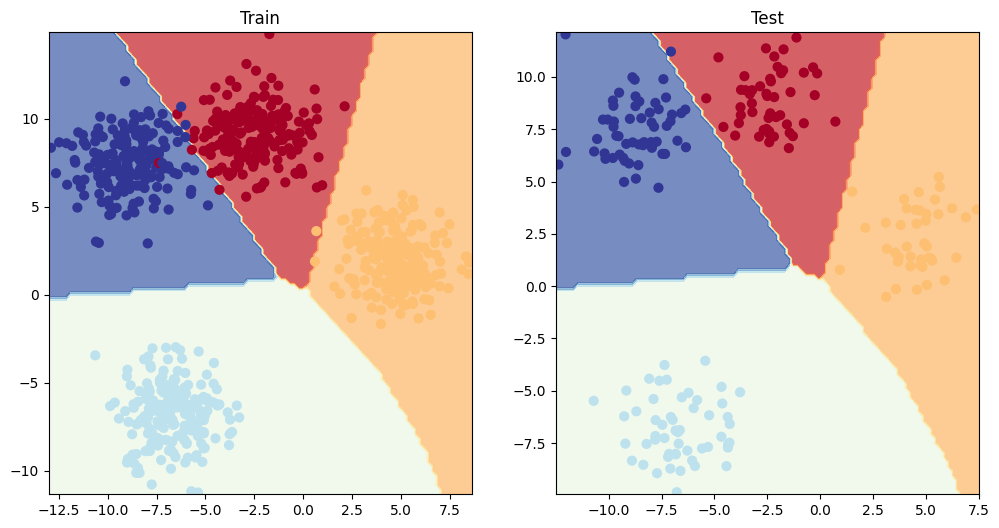

In [85]:
# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics to evalueate our model

* Accuracy - out of 100 examples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [86]:
! pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.8 MB/s eta 0:00:00


In [89]:
from torchmetrics import Accuracy

# Setup metric
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuraccy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')